<center>
<img src="https://www.puc-campinas.edu.br/wp-content/uploads/2021/09/logo-cta-pucc-brasao.png" alt="drawing" width="300"/></center>


---

<center>

# **Ciência de Dados**
---
</cente>

# **Análise Exploratória de dados - Sinais Vitais**

- Ocean Alves dos Santos

RA do líder Gabriel Andrade: 23030242

In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# upload files from Google Drive
! gdown --id 103yJepctv3MO7xKOQ2pIluUmO6XbM4uO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=103yJepctv3MO7xKOQ2pIluUmO6XbM4uO
To: /content/sinaisvitais003 100dias DV2 RAxxx2.txt
100% 140k/140k [00:00<00:00, 74.3MB/s]


In [ ]:
path = '/content/sinaisvitais003 100dias DV2 RAxxx2.txt'
headers = ['HORA', 'BATIMENTO', 'PRESSAO', 'TEMPERATURA']
df = pd.read_csv(path, sep='\t', names = headers)
df.head(10)

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
0,0,66.535898,10.267949,36.559444
1,1,66.935822,10.467911,36.778959
2,2,67.428850,10.714425,36.679811
3,3,68.000000,11.000000,36.686186
4,4,68.631919,11.315960,36.608898
5,5,69.305407,11.652704,36.956328
6,6,70.000000,12.000000,36.666667
7,7,70.694593,12.347296,36.723124
8,8,71.368081,12.684040,36.774994
9,9,72.000000,13.000000,36.820647


In [ ]:
print(f'- Tamanho do DataFrame: Linhas|Colunas -> {df.shape}')
print('\n- Informações do DataFrame:')
#print(df.info())
df.info()

- Tamanho do DataFrame: Linhas|Colunas -> (2400, 4)

- Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HORA         2400 non-null   int64  
 1   BATIMENTO    2400 non-null   float64
 2   PRESSAO      2400 non-null   float64
 3   TEMPERATURA  2400 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 75.1 KB


In [ ]:
#Verificando valores nulos:
df.isnull().sum()

HORA           0
BATIMENTO      0
PRESSAO        0
TEMPERATURA    0
dtype: int64

- Existem 04 colunas no DataFrame com 2400 linhas. E não há valores ausentes na amostra.

Uma das primeiras etapas da mineração de dados é a **preparação da base de dados**. Ao utilizarem o
método `describe()` verá algumas anomalias, valores espúrios ou ruídos que devem ser removidos.

Os **parâmetros máximos** (em repouso) para o batimento cardíaco, a pressão arterial e a temperatura
corporal são os seguintes:
- 0 <= BATIMENTO CARDÍACO <100
- 0 <= PRESSÃO ARTERIAL < 20
- 0 <= TEMPERATURA CORPORAL < 40

In [ ]:
print("\n--------------------------------------------")
print("   DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS")
print("--------------------------------------------")

# DADOS ESTATISTICOS
colunas = ['BATIMENTO', 'PRESSAO', 'TEMPERATURA']
#print(df[colunas].describe())
df[colunas].describe()


--------------------------------------------
   DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS
--------------------------------------------


,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.000000,2400.000000,2400.000000
mean,70.134063,12.190304,36.895765
std,2.821693,1.303648,0.261034
min,61.825247,8.628838,36.456422
25%,68.162112,11.261596,36.748545
50%,70.548158,12.444432,36.893270
75%,72.297147,13.222149,37.002183
max,101.518347,21.778211,41.703370


- Observamos que há valores acima dos parâmetros máximos nas amostras.
- Podemos observar visualmente pelos boxplots a seguir.

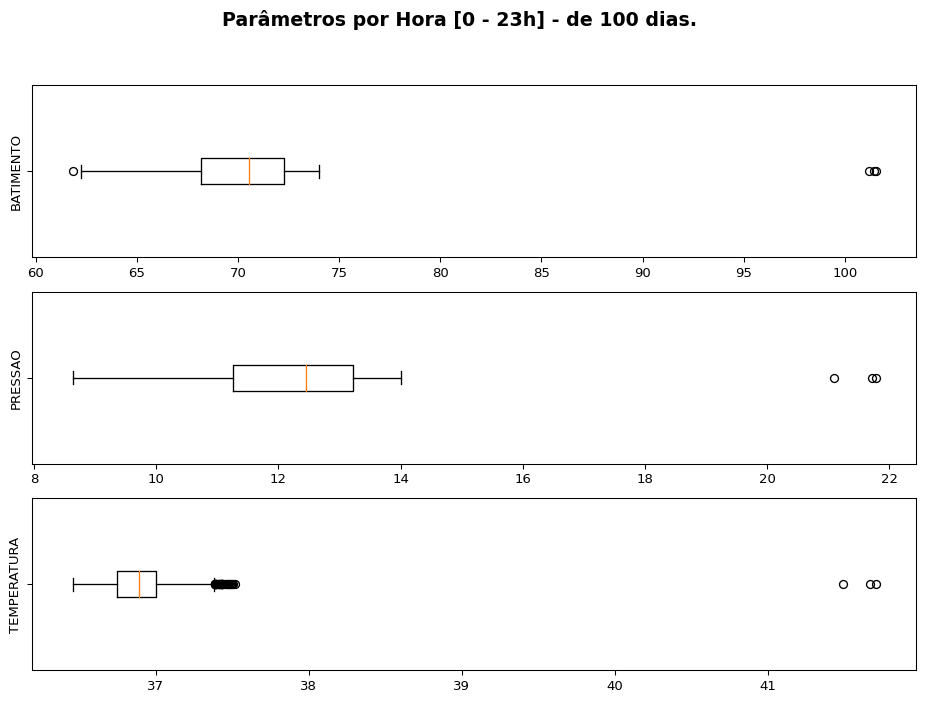

In [ ]:
# Box Plots do parâmetros do DataFrame
fig, axs = plt.subplots(3,1, dpi=95, figsize=(12, 8))
i = 0

colunas = df[['BATIMENTO',	'PRESSAO',	'TEMPERATURA']]

plt.suptitle(f"Parâmetros por Hora [0 - 23h] - de {len(df)/24:.0f} dias." ,
               fontsize = 'x-large' , fontweight = 'bold' )

for col in colunas: #df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].grid(visible=False)
    i+=1

plt.show()

- Observa-se parâmetros com valores acima dos máximos esperados. No caso da **temperatura normal do corpo humano varia entre 36,5ºC e 37ºC**, e nas amostras foram coletados valores acima dos 40º.

In [ ]:
df[['TEMPERATURA']].describe().T

,count,mean,std,min,25%,50%,75%,max
TEMPERATURA,2400.0,36.895765,0.261034,36.456422,36.748545,36.89327,37.002183,41.70337


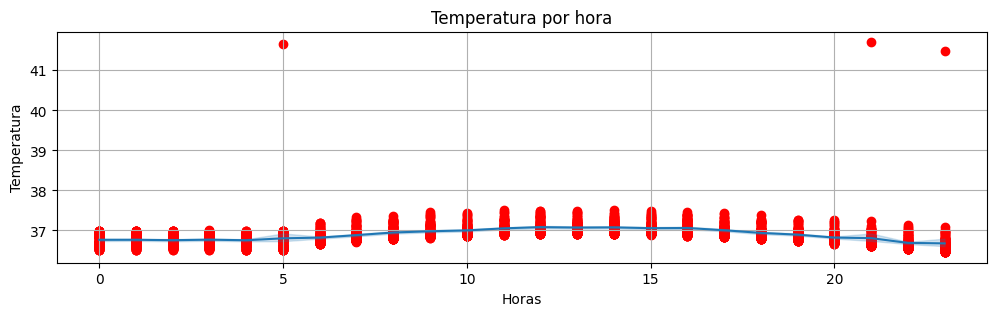

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12, 3))
ax.scatter(df['HORA'], df['TEMPERATURA'], color='r')
sns.lineplot(x="HORA", y="TEMPERATURA", data=df)

# x-axis label
ax.set_xlabel('Horas')

# y-axis label
ax.set_ylabel('Temperatura')
plt.title('Temperatura por hora')
plt.grid()
plt.show()

**Todas as questões abaixo deverão ser implementadas em Python.**


**1.** Desenvolver um procedimento para realizar a preparação dos dados, que geralmente envolve a
remoção ou substituição dos valores que estão fora da faixa de análise padrão por um valor médio
calculado a partir dos valores anteriores e posteriores.

- Tratando outliers, não se recomenda eliminar os valores, pois os dados foram coletados em **intervalos de 24h**, o que eliminaria linhas de dados necessárias para a anlise dos dados. Então a substituição foi pela **media dos valores** dos parâmentros coletados, corringindo assim as anomalias, valores espúrios ou ruídos.

In [ ]:
print('   Estatística dos Parâmetros Coletados:')
print('-------------------------------------------')

df.agg(
    {
        "BATIMENTO": ["min", "max", "median", "mean"],
        "PRESSAO": ["min", "max", "median", "mean"],
        "TEMPERATURA": ["min", "max", "median", "mean"],
    }
)

   Estatística dos Parâmetros Coletados:
-------------------------------------------


,BATIMENTO,PRESSAO,TEMPERATURA
min,61.825247,8.628838,36.456422
max,101.518347,21.778211,41.703370
median,70.548158,12.444432,36.893270
mean,70.134063,12.190304,36.895765


- Foi utilizado a **medida centralidade media** para substituir valores fora dos parâmetros esperados. Pois as amostras têm uma baixa quantidade de valores discrepantes. Como se observa por exemplo na `TEMPERATURA`.

In [ ]:
# Posição do Outlier para temperatura
print(np.where(df['TEMPERATURA'] > 40))

(array([ 599,  885, 1589]),)


In [ ]:
df[df["TEMPERATURA"] > 40].count()

HORA           3
BATIMENTO      3
PRESSAO        3
TEMPERATURA    3
dtype: int64

- Foram encontrados 03 valores acima do máximo.

In [ ]:
#Substituindo valores fora dos valores de referência
dfcopia = df.copy()

print('Substituindo valores fora dos valores de referência.')
print('----------------------------------------------------')
print('- Media dos Parâmetros dentro dos valores esperados:')

#BATIMENTO
#media
media = df['BATIMENTO'].mean()
df.loc[df.BATIMENTO >= 100, 'BATIMENTO'] = media
print(f' -> Media Batimento:   {media:.2f}')

#PRESSAO
#media
media = df['PRESSAO'].mean()
df.loc[df.PRESSAO >= 20, 'PRESSAO'] = media
print(f' -> Media Batimento:   {media:.2f}')

#TEMPERATURA
#media
media = df['TEMPERATURA'].mean()
df.loc[df.TEMPERATURA >= 40, 'TEMPERATURA'] = media
print(f' -> Media Temperatura: {media:.2f}')

Substituindo valores fora dos valores de referência.
----------------------------------------------------
- Media dos Parâmetros dentro dos valores esperados:
 -> Media Batimento:   70.13
 -> Media Batimento:   12.19
 -> Media Temperatura: 36.90


In [ ]:
print("\n--------------------------------------------")
print("ESTATÍSTICA DOS TRÊS PARÂMETROS - CORRIGIDOS")
print("--------------------------------------------")

# DADOS ESTATISTICOS
colunas = ['BATIMENTO', 'PRESSAO', 'TEMPERATURA']
df[colunas].describe()


--------------------------------------------
ESTATÍSTICA DOS TRÊS PARÂMETROS - CORRIGIDOS
--------------------------------------------


,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.000000,2400.000000,2400.000000
mean,70.095018,12.178633,36.889862
std,2.596207,1.261043,0.200513
min,61.825247,8.628838,36.456422
25%,68.162112,11.261596,36.748545
50%,70.546395,12.441193,36.893270
75%,72.289982,13.220701,37.001943
max,74.000000,14.000000,37.520472


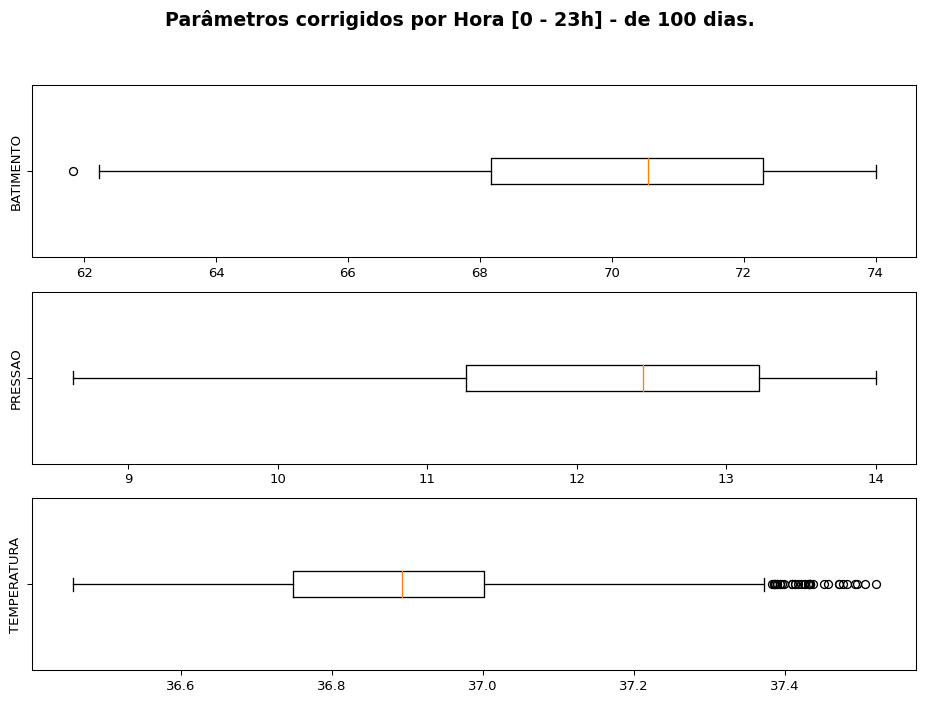

In [ ]:
# Box Plots do parâmetros do DataFrame - corrigidos
fig, axs = plt.subplots(3,1, dpi=95, figsize=(12, 8))
i = 0

colunas = df[['BATIMENTO',	'PRESSAO',	'TEMPERATURA']]

plt.suptitle(f"Parâmetros corrigidos por Hora [0 - 23h] - de {len(df)/24:.0f} dias." ,
               fontsize = 'x-large' , fontweight = 'bold' )

for col in colunas: #df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].grid(visible=False)
    i+=1

plt.show()

In [ ]:
ocTemp = df[df["TEMPERATURA"] > 37].value_counts().sum()
print(f'- Na amostra, {ocTemp} estão acima de 37º. O que representa {ocTemp/len(df)*100:.2f}% das temperaturas.')

- Na amostra, 606 estão acima de 37º. O que representa 25.25% das temperaturas.


In [ ]:
# lista de percentile
perc = [.25, .50, .75]

# lista de dtypes
include = ['object', 'float', 'int']

# metodo describe
desc = df.describe(percentiles=perc, include=include)

# display
desc

,HORA,BATIMENTO,PRESSAO,TEMPERATURA
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,11.500000,70.095018,12.178633,36.889862
std,6.923629,2.596207,1.261043,0.200513
min,0.000000,61.825247,8.628838,36.456422
25%,5.750000,68.162112,11.261596,36.748545
50%,11.500000,70.546395,12.441193,36.893270
75%,17.250000,72.289982,13.220701,37.001943
max,23.000000,74.000000,14.000000,37.520472


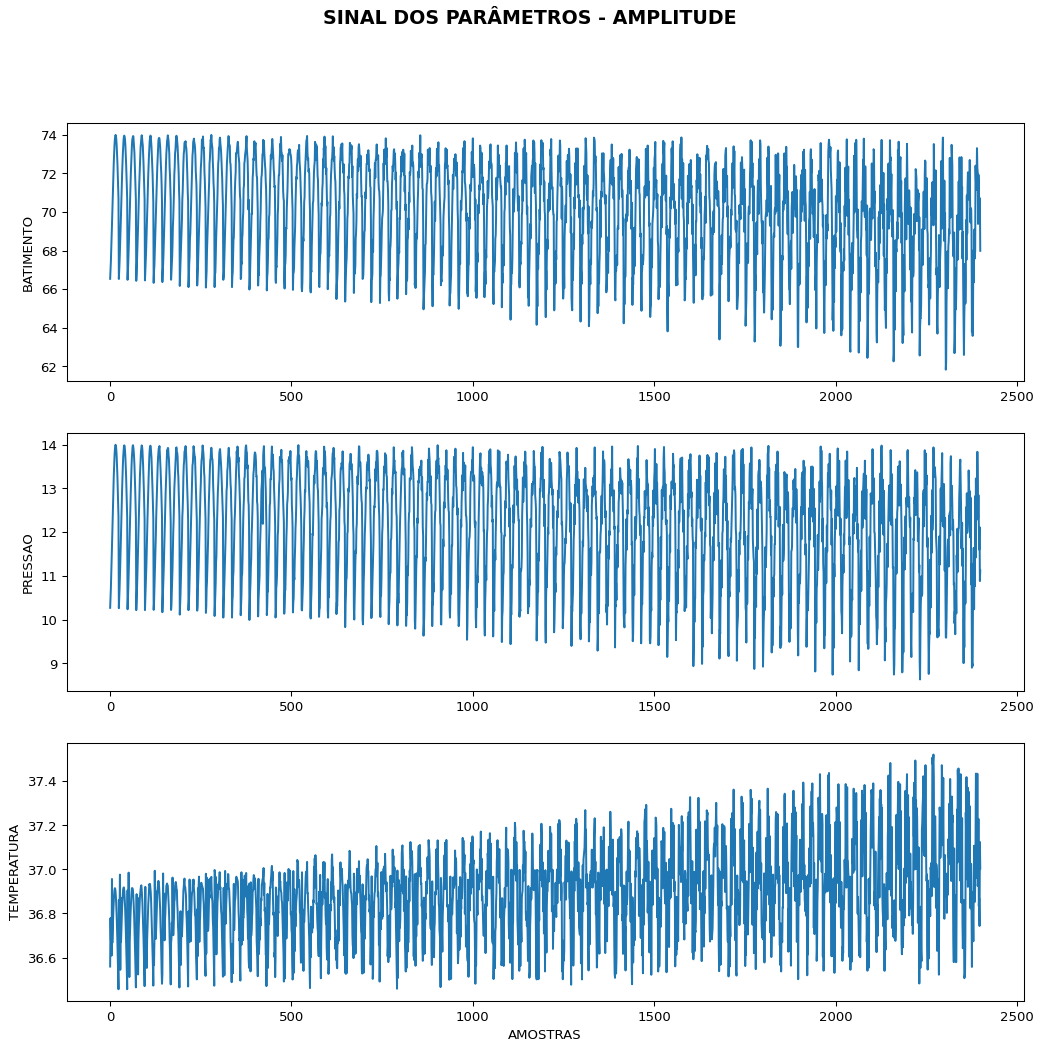

In [ ]:
# Plots - SINAL DOS PARÂMETROS - AMPLITUDE
#fig, axs = plt.subplots(4,1, dpi=95, figsize=(10, 9))
fig, axs = plt.subplots(3,1, dpi=95, figsize=(13, 12))
i = 0

colunas = df[['BATIMENTO',	'PRESSAO',	'TEMPERATURA']]

for col in colunas: #df.columns:
    axs[i].plot(df[col])
    axs[i].set_ylabel(col)
    i+=1

fig.suptitle("SINAL DOS PARÂMETROS - AMPLITUDE" ,
               fontsize = 'x-large' ,
               fontweight = 'bold' )

plt.xlabel("AMOSTRAS")

plt.show()

**2.** Considerando que o pacote padrão de dados contém 24 amostras coletadas a cada hora, aplique
a **correlação** para cada um dos parâmetros (`batimento cardíaco`, `pressão arterial` e `temperatura
corporal`) e busque `identificar padrões` de comportamento nos valores amostrados. Importante
ressaltar que é necessário segmentar o arquivo em pacotes menores, cada um contendo 24
amostras, ou seja, divida o arquivo em pacotes com 24 amostras cada e aplique as ferramentas
estatísticas.



-------------------------------------------------------------------------------------
                   DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS
-------------------------------------------------------------------------------------


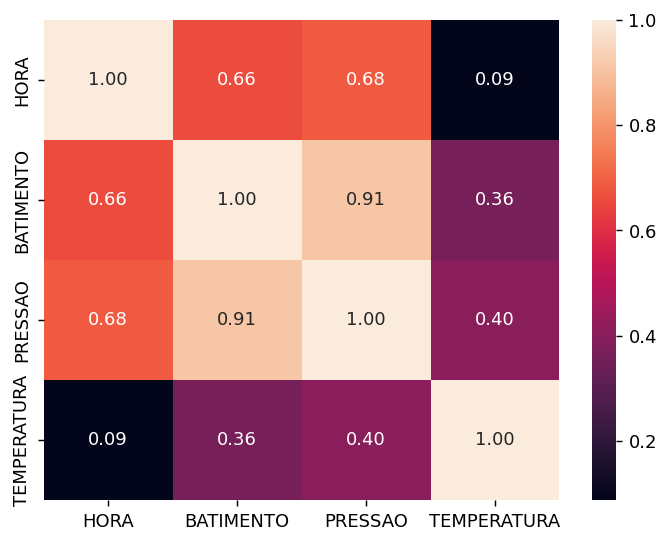

             BATIMENTO  PRESSAO  TEMPERATURA
BATIMENTO         1.00     0.91         0.36
PRESSAO           0.91     1.00         0.40
TEMPERATURA       0.36     0.40         1.00


In [ ]:
#correlation
corr = df.corr()

print("\n\n-------------------------------------------------------------------------------------")
print("                   DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS")
print("-------------------------------------------------------------------------------------")

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
#sns.heatmap(DataFrame.corr(), annot=True, fmt= '.2f')
plt.show()

DataFrame = pd.DataFrame(df,columns=["BATIMENTO", "PRESSAO","TEMPERATURA"])
print(DataFrame.corr().round(2))

- Observa-se uma forte correlação entre PRESSAO e BATIMENTO.

In [ ]:
# Dividindo o dataframe em partes de 24 linhas
lista_dfs = [df.iloc[i:i+24] for i in range(0, len(df), 24)]
print(f'- Levantamento coletado por {len(lista_dfs)} dias.')

- Levantamento coletado por 100 dias.


In [ ]:
# Convertendo um item da lista para uma variável específica usando um dicionário
dataframes = {}
for idx, subset in enumerate(lista_dfs):
    dataframes[f'dataframe_{idx}'] = subset

# Agora você pode acessar o primeiro dataframe como:
#df0 = dataframes['dataframe_0']

# pode ficar na celula anterior
# Criando um dicionário de dataframes
dataframes = {f'dataframe_{idx}': subset for idx, subset in enumerate(lista_dfs)}
fator=int(len(df)/24)

# Agora, criar variáveis df0, df1, ..., df23 usando um loop
for idx in range(fator):  # 24 Supondo que você tenha 24 segmentos
    globals()[f'df{idx}'] = dataframes[f'dataframe_{idx}']



# Criando um dicionário de dataframes
dataframes = {f'dataframe_{idx}': subset for idx, subset in enumerate(lista_dfs)}
fator=int(len(df)/24)

# Agora, criar variáveis df0, df1, ..., df23 usando um loop
for idx in range(fator):  # 24 Supondo que você tenha 24 segmentos
    globals()[f'df{idx}'] = dataframes[f'dataframe_{idx}']

In [ ]:
# pode ficar na celula anterior
# Criando um dicionário de dataframes
dataframes = {f'dataframe_{idx}': subset for idx, subset in enumerate(lista_dfs)}
fator=int(len(df)/24)

# Agora, criar variáveis df0, df1, ..., df23 usando um loop
for idx in range(fator):  # 24 Supondo que você tenha 24 segmentos
    globals()[f'df{idx}'] = dataframes[f'dataframe_{idx}']

In [ ]:
#***** rodar - correlações para todos

# Função para plotar a correlação
def plot_correlation(df, idx):
    plt.figure(figsize=(4, 2))

    # Compute the correlation matrix
    correlation = DataFrame.corr()

    # Use Seaborn's heatmap para plotar a correlação
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlação do Dia: {idx}')
    plt.show()

# Plotar a correlação para cada dataframe
#for idx in range(24):
#    dataframe = globals()[f'df{idx}']
#    plot_correlation(dataframe, idx)

#def get_day_choice():
def qual_day():
    """Obtém a escolha do dia do usuário."""
    while True:
        try:
            # Pergunte ao usuário qual dia ele deseja visualizar
            #day_choice = int(input("Escolha um dia (0-99): "))
            qual_day = int(input("Escolha um dia (0-99): "))

            if 0 <= qual_day <= 99:
                return qual_day
            else:
                print("Por favor, insira um número entre 0 e 99.")
        except ValueError:
            print("Por favor, insira um número válido.")

# Solicite ao usuário que escolha um dia
#day = get_day_choice()

Escolha um dia (0-99): 35


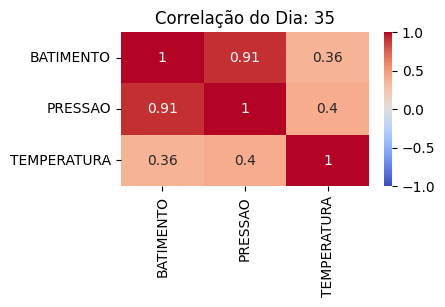

             BATIMENTO  PRESSAO  TEMPERATURA
BATIMENTO         1.00     0.97         0.47
PRESSAO           0.97     1.00         0.49
TEMPERATURA       0.47     0.49         1.00
- A correlação entre BATIMENTO e PRESSAO é forte: 0.97
- A correlação entre PRESSAO e BATIMENTO é forte: 0.97


In [ ]:
# Solicite ao usuário que escolha um dia
day = qual_day()

# Plote a correlação do dataframe escolhido
dataframe = globals()[f'df{day}']
plot_correlation(dataframe, day)
#print(dataframe.corr().round(2))

DataFrame = pd.DataFrame(dataframe,columns=["BATIMENTO", "PRESSAO","TEMPERATURA"])
print(DataFrame.corr().round(2))
#print('\n')

#def check_strong_correlation(df, threshold=0.7):
def checa_correlacao(df, threshold=0.7):
    correlation_matrix = DataFrame.corr()

    # Iterando sobre as colunas da matriz de correlação
    for col in correlation_matrix.columns:
        for idx in correlation_matrix.index:
            # Evitando verificar a correlação de uma variável consigo mesma
            if col == idx:
                continue

            # Verificando se a correlação é forte
            if abs(correlation_matrix[col][idx]) > threshold:
                print(f"- A correlação entre {col} e {idx} é forte: {correlation_matrix[col][idx]:.2f}")

# Exemplo de uso:
#DataFrame = globals()[f'df{day}']
#check_strong_correlation(dataframe)
checa_correlacao(dataframe)

**3.** Divida o arquivo de dados em pacotes com 24 amostras para cada parâmetro, correspondendo a
um dia de amostragem. Em seguida, para cada pacote avaliado, é possível aplicar ferramentas
estatísticas descritivas, como média, mediana, moda, desvio padrão e histograma, a fim de auxiliar
no processo de mineração de dados. Para cada pacote, calcule a `média`, `mediana`, `moda` e `desvio padrão` e `estabeleça critérios para tomada de decisão`. Por exemplo, se o valor médio do batimento
cardíaco e da pressão arterial estiver acima de um determinado limiar, apresente uma mensagem de
atenção ou acione um alarme de emergência.

In [ ]:
print(f'- Quantidade de amostras coletadas: {len(lista_dfs)} dias.')

- Quantidade de amostras coletadas: 100 dias.


In [ ]:
import pandas as pd
colunas = ['BATIMENTO', 'PRESSAO', 'TEMPERATURA']

def calcula_estatisticas_checa(df, idx):
    print(f"Dados estatísticos para o dia: {idx}:")

    # Calculando e imprimindo a média, mediana, moda e desvio padrão
    mean_values = df[colunas].mean()
    print("\nMédia:")
    print(mean_values)

    print("\nMediana:")
    print(df[colunas].median())

    print("\nModa:")
    print(df[colunas].mode().iloc[0])

    print("\nDesvio Padrão:")
    print(df[colunas].std())

    # Verificando condições e acionando alarmes
    batimento_max = 75  # Exemplo de limiar para batimento cardíaco
    pressao_max = 12    # Exemplo de limiar para pressão arterial4
    tem_max = 37    # Exemplo de limiar para pressão arterial

    if mean_values['TEMPERATURA'] > tem_max and mean_values['PRESSAO'] > pressao_max:
        print("\n[ALERTA] - Valor médio da temperatura e pressão acima acima dos limites!")

    elif mean_values['PRESSAO'] > pressao_max:
        print("\n[ALERTA] - Valor médio da pressão acima dos limites!")

    else:
        print("\n[ALERTA] - Valor médio da temperatura acima acima dos limites!")

    print("-" * 62)

# Solicite ao usuário que escolha um dia
day = qual_day()

# Exemplo de uso:
df_idx_to_analyze = day  # Você pode alterar este índice conforme sua escolha
dataframe = globals()[f'df{df_idx_to_analyze}']
calcula_estatisticas_checa(dataframe, df_idx_to_analyze)


Escolha um dia (0-99): 35
Dados estatísticos para o dia: 35:

Média:
BATIMENTO      70.581223
PRESSAO        12.318203
TEMPERATURA    36.878662
dtype: float64

Mediana:
BATIMENTO      71.204310
PRESSAO        12.920999
TEMPERATURA    36.919307
dtype: float64

Moda:
BATIMENTO      66.059245
PRESSAO         9.790984
TEMPERATURA    36.562707
Name: 0, dtype: float64

Desvio Padrão:
BATIMENTO      2.491247
PRESSAO        1.224187
TEMPERATURA    0.170605
dtype: float64

[ALERTA] - Valor médio da pressão acima dos limites!
--------------------------------------------------------------
